In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import statsmodels.api as sm
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeRegressor

os.chdir('/Users/matthewhartz/python_practice/projects/mktg_326/data')

In [85]:
df = pd.read_excel("test3.xlsx")

columns_to_drop = ['Timestamp', 'How much time, on average, do you spend looking at ads on social media? (in hours)',
                  'How often in a month do you buy products online? ']

df.drop(index=df.index[0:3], axis=0, inplace=True )

In [96]:
#Tags for Social Media used
df['facebook_tag'] = 0
df['ig_tag'] = 0
df['tiktok_tag'] = 0
df['twitter_tag'] = 0
df['snapchat_tag'] = 0
df['reddit_tag'] = 0
df['youtube_tag'] = 0
df['linkedin_tag'] = 0
df['whatsapp_tag'] = 0

#Transform Social entries into list without spaces
socials = [row.split(',') for row in df['Check all social media that you use at least once a week.']]
socials = [[row[x].strip() for x in range(len(row))] for row in socials]
df['socials'] = socials

#Transform Produt verticals into list without spaces
product_verticals = [row.split(',') for row in df['Check all products that you buy from online stores (Clothing/Electronics/Appliances/etc.).']]
product_verticals = [[row[x].strip() for x in range(len(row))] for row in product_verticals]
df['product_verticals'] = product_verticals


influencer_interaction_types = [row.split(',') for row in df['Check all types of influencers you interact with.']]
influencer_interaction_types = [[row[x].strip() for x in range(len(row))] for row in influencer_interaction_types]
df['influencer_interaction_types'] = influencer_interaction_types 

In [97]:
#Encode Socials
df['twitter_tag'] = df['socials'].apply(lambda row: 1 if 'Twitter' in row else 0)

df['ig_tag'] = df['socials'].apply(lambda row: 1 if 'Instagram' in row else 0)

df['tiktok_tag'] = df['socials'].apply(lambda row: 1 if 'TikTok' in row else 0)

df['snapchat_tag'] = df['socials'].apply(lambda row: 1 if 'Snapchat' in row else 0)

df['reddit_tag'] = df['socials'].apply(lambda row: 1 if 'Reddit' in row else 0)

df['youtube_tag'] = df['socials'].apply(lambda row: 1 if 'YouTube' in row else 0)

df['whatsapp_tag'] = df['socials'].apply(lambda row: 1 if 'Whatsapp' in row else 0)

df['linkedin_tag'] = df['socials'].apply(lambda row: 1 if 'LinkedIn' in row else 0)

df['facebook_tag'] = df['socials'].apply(lambda row: 1 if 'Facebook' in row else 0)

#Encode Product Verticals

df['clothing_tag'] = df['product_verticals'].apply(lambda row: 1 if 'Clothing' in row else 0)

df['shoes_tag'] = df['product_verticals'].apply(lambda row: 1 if 'Shoes' in row else 0)

df['cosmetics_tag'] = df['product_verticals'].apply(lambda row: 1 if 'Cosmetics' in row else 0)

df['electronics_tag'] = df['product_verticals'].apply(lambda row: 1 if 'Electronics' in row else 0)

df['groceries_tag'] = df['product_verticals'].apply(lambda row: 1 if 'Groceries' in row else 0)

df['appliances_tag'] = df['product_verticals'].apply(lambda row: 1 if 'Appliances' in row else 0)

df['essentials_tag'] = df['product_verticals'].apply(lambda row: 1 if 'Essentials' in row else 0)

#Encode Influencer Types

df['mega_influencer_tag'] = df['influencer_interaction_types'].apply(lambda row: 1 if 'Mega-Influencers (More than 1 million followers — Celebrities)' in row else 0)

df['macro_influencer_tag'] = df['influencer_interaction_types'].apply(lambda row: 1 if 'Macro-Influencers (500K to 1 million followers)' in row else 0)

df['midtier_influencer_tag'] = df['influencer_interaction_types'].apply(lambda row: 1 if 'Mid-tier Influencers (50K to 500K followers)' in row else 0)

df['micro_influencer_tag'] = df['influencer_interaction_types'].apply(lambda row: 1 if 'Micro-Influencers (10K to 50K followers)' in row else 0)

df['nano_influencer_tag'] = df['influencer_interaction_types'].apply(lambda row: 1 if 'Nano-Influencers (1K to 10K followers)' in row else 0)


In [89]:
#Encode columns

df['bought_product_influencer_tag'] = 0
df['bought_product_ad_tag'] = 0


df['bought_product_influencer_tag'] = df['Have you ever bought a product from an influencer’s sponsored post?'].apply(lambda row: 1 if row=='Yes' else 0)
df['bought_product_ad_tag'] = df['Have you ever bought a product that you first heard about from an advertisement on social media?'].apply(lambda row: 1 if row=='Yes' else 0)
df['gender_tag'] = df['What gender do you identify with?'].apply(lambda row: 1 if row=='Female' else 0)


   
df['buy_product_likelihood']= df['How often do you buy a product that is being promoted by an influencer?'].map({'Never':0, 'Rarely':1, 'Sometimes':2, 'Always':3, 'Often':4})  
df['click_freq']= df['How often do you click on an ad in your social media feed?'].map({'Never':0, 'Rarely':1, 'Sometimes':2, 'Always':3, 'Often':4})  
df['time_spent_on_social'] = df['Approximately how much time do you spend, on average, on social media each day? (in hours) '].map({'Less than 30 minutes': .5, 'At least 30 minutes, but less than 1 hour': 1
                                                                                                                                   , 'At least one hour, but less than 1-1/2 hours': 1.5, 
                                                                                                                                    'At least 1-1/2 hours, but less than 2 hours' : 2, 
                                                                                                                                   '2 hours or more': 3})


df['shopping_rate'] = df['What percentage of your shopping is done online? (in %)'].map({'0-10%': .5, '11-30%': .2, '31-50%': .4, '51-80%' : .65, '81-100%': .9})



In [90]:
#Impute NaNs

In [92]:
#Rate of tiktok use

sum(df['tiktok_tag'])/len(df['tiktok_tag'])

df['tiktok_tag'].value_counts()

0    55
1    51
Name: tiktok_tag, dtype: int64

In [117]:
#Descriptives

total_responses = len(df['bought_product_influencer_tag'])

#percent of users who bought a product an influencer was pushing
influencer_rate = sum(df['bought_product_influencer_tag'])/len(df['bought_product_influencer_tag'])


#percent of users who bought a product directly from an ad
ad_rate = sum(df['bought_product_ad_tag'])/len(df['bought_product_ad_tag'])

#Create dict containing percent of users who use each social media
facebook_rate = sum(df['facebook_tag'])/total_responses
tiktok_rate = sum(df['tiktok_tag'])/total_responses
linkedin_rate = sum(df['linkedin_tag'])/total_responses
twitter_rate = sum(df['twitter_tag'])/total_responses
snapchat_rate = sum(df['snapchat_tag'])/total_responses
reddit_rate = sum(df['reddit_tag'])/total_responses
ig_rate = sum(df['ig_tag'])/total_responses
youtube_rate = sum(df['youtube_tag'])/total_responses
whatsapp_rate = sum(df['whatsapp_tag'])/total_responses

social_networks = ['Facebook', 'Tiktok', 'Linkedin', 'Twitter', 
                  'Snapchat', 'Reddit', 'Instagram', 'Youtube', 'Whatsapp']

social_network_rates = [facebook_rate, tiktok_rate, linkedin_rate, twitter_rate, snapchat_rate
                       , reddit_rate, ig_rate, youtube_rate, whatsapp_rate]

social_network_rates_dict = {social_networks[i]: social_network_rates[i] for i in range(len(social_networks))}

for key, value in social_network_rates_dict.items():
    social_network_rates_dict[key] = round(value*100,2)


#create dict containing percentage of users who buy each type of products
clothing_rate = sum(df['clothing_tag'])/total_responses
shoes_rate = sum(df['shoes_tag'])/total_responses
cosmetics_rate = sum(df['cosmetics_tag'])/total_responses
electronics_rate = sum(df['electronics_tag'])/total_responses
groceries_rate = sum(df['groceries_tag'])/total_responses
appliances_rate = sum(df['appliances_tag'])/total_responses
essentials_rate = sum(df['essentials_tag'])/total_responses


products_bought = ['Clothing', 'Shoes', 'Cosmetics', 'Electronics', 'Groceries', 'Appliances', 'Essentials']

products_bought_rates = [clothing_rate, shoes_rate, cosmetics_rate, electronics_rate, groceries_rate
                        , appliances_rate, essentials_rate]

products_bought_rates_dict = {products_bought[i]: products_bought_rates[i] for i in range(len(products_bought))}


for key, value in products_bought_rates_dict.items():
    products_bought_rates_dict[key] = round(value*100,2)
    

#Create column that sums up all social medias
df['total_socials'] = df.iloc[:, 32:41].sum(axis=1)

#create column that sums up all product types bought
df['total_product_types'] = df.iloc[:, 43:50].sum(axis=1)


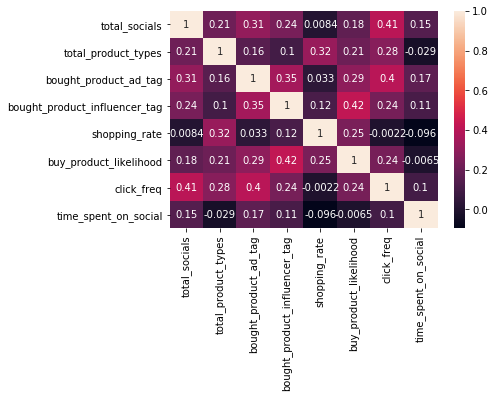

In [118]:
cols_in_corr = ['total_socials', 'total_product_types', 'bought_product_ad_tag', 'bought_product_influencer_tag',
               'shopping_rate', 'buy_product_likelihood', 'click_freq', 'time_spent_on_social']
df_corr = df[cols_in_corr]

corrMatrix = df_corr.corr()

sns.heatmap(corrMatrix, annot=True)
plt.show()

In [120]:
df['bought_product_ad_factor']= df['bought_product_ad_tag'].map({0:"Below", 1 : 'Above'})  
df['bought_product_influencer_factor']= df['bought_product_influencer_tag'].map({0:"Below", 1 : 'Above'})  

#spit out df as file
df.to_csv('r_mktg326.csv',index=False)